In [1]:
import torch

In [2]:
t1 = torch.tensor([i for i in range(1,10,2)])
t2 = torch.tensor([i for i in range(1,20,4)])

In [3]:
t1

tensor([1, 3, 5, 7, 9])

In [4]:
t2

tensor([ 1,  5,  9, 13, 17])

In [5]:
t1+t2

tensor([ 2,  8, 14, 20, 26])

In [6]:
t1*t2  # elementwise

tensor([  1,  15,  45,  91, 153])

In [7]:
t2 = torch.tensor([[1,2,5,6,8]])

In [8]:
t1.matmul(t2.T) # matrix multiplication

tensor([146])

In [9]:
t1-t2

tensor([[0, 1, 0, 1, 1]])

In [10]:
t1/t2

tensor([[1.0000, 1.5000, 1.0000, 1.1667, 1.1250]])

In [11]:
x = t1.numpy()

In [12]:
type(x)

numpy.ndarray

In [13]:
t1.add_(2*2)  # If tensor stored in CPU, inplace operations to a tensor will share common memory

tensor([ 5,  7,  9, 11, 13])

In [14]:
x

array([ 5,  7,  9, 11, 13], dtype=int64)

In [15]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

### GPU

In [16]:
torch.cuda.is_available() # checks if gpu available 

if torch.cuda.is_available():
    device = torch.device('cuda')
    x = torch.ones(5, device=device)
    z = x **3
    z = z.to(device) # moves to gpu

    y = x+z # runs on gpu

    y.numpy() ## ERROR, numpy can only handle CPU tensors

### Gradient

In [17]:
# regression slope form
# y = mx + c

x = torch.tensor(3.0)

m = torch.tensor(1.0, requires_grad=True)
c = torch.tensor(5.0, requires_grad=True)

y = m*x + c

y.backward() # dy/dx = m + 1 
print(f'Grad of m : {m.grad}') # --> 3
print(f'Grad of c : {c.grad}') # --> 1

Grad of m : 3.0
Grad of c : 1.0


In [18]:
x = torch.randn(5, requires_grad=True)
print(x)

z = x.requires_grad_(False) ## setting the grad to tensor
print(z)

y = x.detach() ## new tensor detaching the grad functn
print(y)

tensor([ 1.0468, -1.6157, -1.3622, -0.3899, -0.7375], requires_grad=True)
tensor([ 1.0468, -1.6157, -1.3622, -0.3899, -0.7375])
tensor([ 1.0468, -1.6157, -1.3622, -0.3899, -0.7375])


In [19]:
x = torch.tensor([.1,2,5,7,9], requires_grad=True)
with torch.no_grad():
    y = x + 2.03*1.485
y

tensor([ 3.1145,  5.0146,  8.0146, 10.0146, 12.0146])

In [20]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(5):  # Training loop
    model_output = (weights*3).sum()

    model_output.backward()
    print(weights.grad)

    weights.grad.zero_() # setting the grad zero for every loop

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


### Back propagation

```x ---> a(x) ---->y b(y) ----> z```

**Chain Rule:**
Gradient -> dz/dx = dz/dy*dy/dx 

```Computational Graph```

**Notes**

* 3 steps process:
1. Forward pass: Compute loss
2. Compute local gradients
3. Backward pass: Compute ```d(Loss)/d(Weights)``` using chain rule



In [21]:
## Example 
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass & calc loss
y_hat = w*x
loss = (y_hat-y)**2

print(loss)

#backward pass
loss.backward()
print(w.grad)


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In general we can build any model by 4 ways:

* case: 1
    * Prediction: Manually
    * Gradients Computation: Manually
    * Loss Computation: Manually
    * Parameter updates: Manually 

* case: 2
    * Prediction: Manually
    * Gradients Computation: Autograd
    * Loss Computation: Manually
    * Parameter updates: Manually 

* case: 3
    * Prediction: Manually
    * Gradients Computation: Autograd
    * Loss Computation: PyTorch Loss
    * Parameter updates: PyTorch Optimizer

* case: 4
    * Prediction: PyTorch Model
    * Gradients Computation: Autograd
    * Loss Computation: PyTorch Loss
    * Parameter updates: PyTorch Optimizer
    

## Case: 1

In [22]:
# f = w*x
# f = 2*x

X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE

def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

## Gradient 
## MSE          =    1/N *  (w*x - y)**2
## d(MSE)/dw    =    1/N 2x (w*x - y)

def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

# Training
n_iters = 20
learning_rate = 0.01

print(f'prediction before training: f(5) = {forward(5)}')

for epoch in range(n_iters):
    
    y_pred = forward(X) # forward pass
        
    l = loss(Y, y_pred) #loss
    
    dw = gradient(X,Y,y_pred) # gradients

    w -= learning_rate * dw  # update weights 

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}') 

print(f'prediction after training: f(5) = {forward(5)}')


prediction before training: f(5) = 0.0
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
prediction after training: f(5) = 9.99999977350235


## Case: 2

In [23]:
# f = w * x
# f = 2 * x

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

# Training
n_iters = 100
learning_rate = 0.01

print(f'prediction before training: f(5) = {forward(5)}')

for epoch in range(n_iters):
    
    y_pred = forward(X) # forward pass
        
    l = loss(Y, y_pred) #loss
    
    l.backward() # gradient = dl/dw

    with torch.no_grad():
        w -= learning_rate * w.grad  # update weights 

    w.grad.zero_() 

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}') 

print(f'prediction after training: f(5) = {forward(5):.3f}')


prediction before training: f(5) = 0.0
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
prediction after training: f(5) = 10.000


## Case: 3

In [24]:
## Training pipeline in pytorch
# 1. design model 
# 2. construct loss and optimizer
# 3. training loop
#      - forward pass: compute prediction
#      - backward pass: gradients
#      - update weights

# f = w * x
# f = 2 * x
import torch.nn as nn


X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x


n_iters = 100
learning_rate = 0.01

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w],lr=0.01)

print(f'prediction before training: f(5) = {forward(5)}')

# Training
for epoch in range(n_iters):
    
    y_pred = forward(X) # forward pass
        
    l = loss(Y, y_pred) #loss
    
    l.backward() # gradient = dl/dw

    optimizer.step()  # update weights 

    w.grad.zero_() 

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}') 

print(f'prediction after training: f(5) = {forward(5):.3f}')


prediction before training: f(5) = 0.0
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
prediction after training: f(5) = 10.000


## Case: 4

In [25]:
## Training pipeline in pytorch
# 1. design model 
# 2. construct loss and optimizer
# 3. training loop
#      - forward pass: compute prediction
#      - backward pass: gradients
#      - update weights

# f = w * x
# f = 2 * x
import torch.nn as nn


X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

n_iters = 100
learning_rate = 0.01

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

print(f'prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
for epoch in range(n_iters):
    
    y_pred = model(X) # forward pass
        
    l = loss(Y, y_pred) #loss
    
    l.backward() # gradient = dl/dw

    optimizer.step()  # update weights 

    w.grad.zero_() 

    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}') 

print(f'prediction after training: f(5) = {model(X_test).item():.3f}')


4 1
prediction before training: f(5) = 4.994
epoch 1: w = 1.046, loss = 6.64694309
epoch 11: w = 1.518, loss = 0.50624496
epoch 21: w = 1.325, loss = 0.91638166
epoch 31: w = 1.341, loss = 0.56927085
epoch 41: w = 1.534, loss = 0.32707059
epoch 51: w = 1.711, loss = 0.13135080
epoch 61: w = 1.806, loss = 0.05103639
epoch 71: w = 1.853, loss = 0.02854154
epoch 81: w = 1.885, loss = 0.01750698
epoch 91: w = 1.914, loss = 0.00994167
prediction after training: f(5) = 9.830


In [26]:
# creating a custom model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()

        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)


model = LinearRegression(input_size, output_size)

#### Linear regression

In [27]:
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 10, loss = 1057.2358
epoch: 20, loss = 688.1647
epoch: 30, loss = 448.3559
epoch: 40, loss = 292.4375
epoch: 50, loss = 190.9962
epoch: 60, loss = 124.9536
epoch: 70, loss = 81.9271
epoch: 80, loss = 53.8759
epoch: 90, loss = 35.5746
epoch: 100, loss = 23.6255


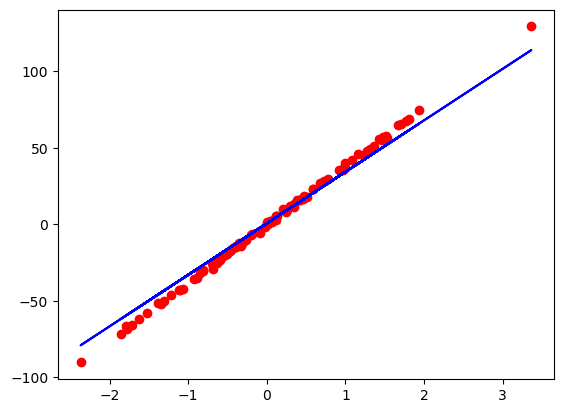

In [28]:
# prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise = 1, random_state=32 )

x = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape

# 1. model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2. loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. training loop
num_epochs = 100
for num in range(num_epochs):
    # forward pass
    y_pred = model(x)
    
    # Loss
    loss = criterion(y, y_pred)
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (num+1) % 10 == 0:
        print(f'epoch: {num+1}, loss = {loss.item():.4f}')

# plot

predicted = model(x).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b' )
plt.show()

### Logistic regression

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# prepare data

data = datasets.load_breast_cancer()

X, y = data.data, data.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1. model

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self,x):
        predicted = torch.sigmoid(self.linear(x))
        return predicted

model = LogisticRegression(n_features)

# 2. loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    #updates
    optimizer.step()
    #zero grad
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')




epoch: 10, loss = 0.5155
epoch: 20, loss = 0.4363
epoch: 30, loss = 0.3835
epoch: 40, loss = 0.3459
epoch: 50, loss = 0.3177
epoch: 60, loss = 0.2957
epoch: 70, loss = 0.2780
epoch: 80, loss = 0.2634
epoch: 90, loss = 0.2510
epoch: 100, loss = 0.2405
accuracy = 0.9386


## Dataset and Dataloader

In [30]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader

# Custom dataset 

class TitanicData(Dataset):
    def __init__(self, pre_process=None):
        super(TitanicData, self).__init__()
        data = pd.read_csv('./data/titanic.csv')
        if pre_process:
            self.features = PreProcess()

        #self.features = data.drop('Survived', axis=1).to_numpy()
        self.target = data[['Survived']].to_numpy()
        
        self.target_col = 'Survived'
        self.feature_cols = [col for col in data.columns if col != self.target_col]
        self.pre_process = pre_process

    def __len__(self): 
        return self.features[0]

    def __getitem__(self, index):
        sample = self.features[index], self.target[index]
        if self.pre_process:
            sample = self.pre_process(sample)

        return sample


class PreProcess:
    def __call__(self, df):
        return df.iloc[:,[0,1,5,6,7]]
        



In [31]:
my_data = TitanicData(pre_process=PreProcess())

#data_loader = DataLoader(dataset=my_data, batch_size=5, shuffle=True)

# total_samples = len(my_data)
# n_iterations = total_sample/batch_size
#for epoch in range(num_epochs):
#   for i, (inputs, labels) in enumerate(data_loader):



In [32]:
my_data.features

In [33]:
import torchvision

#dataset = torchvision.datasets.MNIST(root='MNIST/raw/train-images-idx3-ubyte' )

### Activation functions 
* Apply a non-linear transformation and decide whether a neuron should be activated or not.

1. Step function 
2. Sigmoid 
3. Tanh
4. RelU
5. Leaky ReLU -- modified version of relu to update the weights better
6. Softmax -- Good for multi class classification problems in last layers

In [34]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

## Transfer Learning
Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task or in other words it allows us to take the patterns (also called weights) another model has learned from another problem and use them for our own problem.

For Eg:
- we can take the patterns a computer vision model has learned from datasets such as ImageNet (millions of images of different objects) and use them to power our FoodVision Mini model.

- Or we could take the patterns from a language model (a model that's been through large amounts of text to learn a representation of language) and use them as the basis of a model to classify different text samples.

*******************************

Often, code and pretrained models for the latest state-of-the-art research is released within a few days of publishing.

And there are several places you can find pretrained models to use for your own problems.



| Location | what's there ? | Link(s)|
|----|----|-----|
|PyTorch domain libraries | Each of the PyTorch domain libraries (torchvision, torchtext) come with pretrained models of some form. The models there work right within PyTorch. | torchvision.models, torchtext.models, torchaudio.models, torchrec.models
|HuggingFace Hub |A series of pretrained models on many different domains (vision, text, audio and more) from organizations around the world. There's plenty of different datasets too. |	https://huggingface.co/models, https://huggingface.co/datasets
|timm (PyTorch Image Models) library |	Almost all of the latest and greatest computer vision models in PyTorch code as well as plenty of other helpful computer vision features. |	https://github.com/rwightman/pytorch-image-models
|Paperswithcode |	A collection of the latest state-of-the-art machine learning papers with code implementations attached. You can also find benchmarks here of model performance on different tasks. 	|https://paperswithcode.com/|



In [35]:
metmast = pd.read_csv('./data/window/messmast.csv', sep=',')
turbine = pd.read_csv('./data/window/turbine_data.csv', sep=',', index_col='Zeitstempel (UTC)')
data = pd.merge(metmast, turbine[['ws_2']], left_index=True, right_index=True )
train = torch.tensor(data.iloc[:,:-1])
test = torch.tensor(data.iloc[:,-1])

FileNotFoundError: [Errno 2] No such file or directory: './data/window/messmast.csv'

In [ ]:
metmast['Date/time'] = pd.to_datetime(metmast['Date/time'])

In [ ]:
def get_formatdata(df):
        
        df = df.drop(columns='Unnamed: 0', axis=1)#,inplace=True)
        #self.data = self.data.set_index('Date/time')#, inplace = True)
        
        df['Date/time'] = pd.to_datetime(df['Date/time'])
        df = df.set_index(df['Date/time'])
        df = df.drop('Date/time', axis=1)
        
        df = df.replace(r'\W', np.NaN, regex=True)

        
        
        data = df.rename(columns={'VZ1-03210099;wind_speed;Avg':'ws_142', 'V01-11208098;wind_speed;Avg':'ws_136',
                   'V02-11208099;wind_speed;Avg':'ws_119','V03-11208100;wind_speed;Avg':'ws_99',
                   'V04-11208101;wind_speed;Avg':'ws_79','V05-11208102;wind_speed;Avg':'ws_59',
                   'V06-11208103;wind_speed;Avg':'ws_39','VZ1-03210099;wind_direction;Avg':'wd_142', 
                   'D01-08170370;wind_direction;Avg':'wd_136', 'D02-08170369;wind_direction;Avg':'wd_79',
                   'HT1-236609;humidity;Avg':'H_136', 'HT2-236616;humidity;Avg':'H_99', 'HT3-236615;humidity;Avg':'H_30',
                   'VZ1-03210099;temperature;Avg':'Temp_142','HT1-236609;temperature;Avg':'Temp_136','HT2-236616;temperature;Avg':'Temp_99',
                   'HT3-236615;temperature;Avg':'Temp_30','BP1-150931338;air_pressure;Avg':'Press_16','VZ1-03210099;wind_speed_vert;Avg':'ws_vert_142'
                    })#, inplace=True)
        data= data.loc[:,['ws_142','ws_136','ws_119','ws_99','ws_79','ws_59','ws_39','ws_vert_142',
                                   'wd_142','wd_136','wd_79',
                                   'H_136', 'H_99', 'H_30',
                                   'Temp_142','Temp_136','Temp_99','Temp_30',
                                   'Press_16']]
        
        data['ws_142'] = data['ws_142'].astype('float') 
        data['ws_vert_142'] = data['ws_vert_142'].astype('float') 
        data['wd_142'] = data['wd_142'].astype('float') 
        data['Temp_142'] = data['Temp_142'].astype('float')
        
        
        
        return data

In [ ]:
df = get_formatdata(metmast)

In [ ]:
df.head()

,ws_142,ws_136,ws_119,ws_99,ws_79,ws_59,ws_39,ws_vert_142,wd_142,wd_136,wd_79,H_136,H_99,H_30,Temp_142,Temp_136,Temp_99,Temp_30,Press_16
Date/time,,,,,,,,,,,,,,,,,,,
2021-04-12 11:40:00,3.931345,3.5941,3.4347,3.4370,3.5016,3.1546,3.0875,0.860156,312.732139,322.3690,327.7007,88.0372,76.3993,63.7943,2.383594,0.64610,1.29480,2.87416,965.7203
2021-04-12 11:50:00,5.701858,5.7110,5.4175,5.0774,4.7813,4.1719,3.3333,0.189500,305.892721,317.0449,319.0200,84.9587,72.7240,61.7138,2.187667,0.78178,1.41981,2.92920,965.7775
2021-04-12 12:00:00,4.890241,4.9387,4.8586,4.7327,4.4761,3.9801,3.3026,-0.249167,310.476240,322.0373,318.0044,79.9982,66.7090,55.3366,2.192500,0.82740,1.49020,3.11732,965.7703
2021-04-12 12:10:00,3.203742,3.2559,3.3009,3.3110,3.2263,2.9706,2.5173,0.271619,297.163956,309.3719,308.7647,78.5538,65.8790,53.6178,2.417028,1.09967,1.66077,3.27193,965.7675
2021-04-12 12:20:00,2.985836,2.8777,2.8353,2.6931,2.6192,2.4969,2.2133,0.687952,311.173388,323.2776,321.6449,76.4070,65.3727,52.6634,2.703442,1.42088,1.96130,3.60125,965.7871


In [ ]:
df.to_csv('./data/new_test.csv')

In [ ]:
data = pd.read_csv('./data/window/metmast.csv', date_parser='Date/time' )
data.head()

,Date/time,ws_142,ws_136,ws_119,ws_99,ws_79,ws_59,ws_39,ws_vert_142,wd_142,wd_136,wd_79,H_136,H_99,H_30,Temp_142,Temp_136,Temp_99,Temp_30,Press_16
0,2021-04-12 11:40:00,3.931345,3.5941,3.4347,3.4370,3.5016,3.1546,3.0875,0.860156,312.732139,322.3690,327.7007,88.0372,76.3993,63.7943,2.383594,0.64610,1.29480,2.87416,965.7203
1,2021-04-12 11:50:00,5.701858,5.7110,5.4175,5.0774,4.7813,4.1719,3.3333,0.189500,305.892721,317.0449,319.0200,84.9587,72.7240,61.7138,2.187667,0.78178,1.41981,2.92920,965.7775
2,2021-04-12 12:00:00,4.890241,4.9387,4.8586,4.7327,4.4761,3.9801,3.3026,-0.249167,310.476240,322.0373,318.0044,79.9982,66.7090,55.3366,2.192500,0.82740,1.49020,3.11732,965.7703
3,2021-04-12 12:10:00,3.203742,3.2559,3.3009,3.3110,3.2263,2.9706,2.5173,0.271619,297.163956,309.3719,308.7647,78.5538,65.8790,53.6178,2.417028,1.09967,1.66077,3.27193,965.7675
4,2021-04-12 12:20:00,2.985836,2.8777,2.8353,2.6931,2.6192,2.4969,2.2133,0.687952,311.173388,323.2776,321.6449,76.4070,65.3727,52.6634,2.703442,1.42088,1.96130,3.60125,965.7871


In [ ]:
class Data:
    
    def __init__(self, target_col):
        metmast = pd.read_csv('./data/window/metmast.csv', sep=',')
        metmast['Date/time'] = pd.to_datetime(metmast['Date/time'])
        metmast.set_index('Date/time', inplace=True)
        
        turbine = pd.read_csv('./data/window/turbine_data.csv', sep=',')
        turbine['Zeitstempel (UTC)'] = pd.to_datetime(turbine['Zeitstempel (UTC)'])
        turbine = turbine.set_index(turbine['Zeitstempel (UTC)'])
        turbine = turbine.drop('Zeitstempel (UTC)', axis=1)
        
        data = pd.merge(metmast, turbine[[target_col]], left_index=True, right_index=True )
        self.data = data.dropna()
        self.train = torch.tensor(data.iloc[:,:-1].values, dtype=torch.float32)
        self.target = torch.tensor(data.iloc[:,-1].values, dtype=torch.float32)
    
    def __len__(self):
        return self.train.shape[0]
    
    def __getitem__(self, idx):
        return {'x':self.train[idx, :], 'y':self.target[idx]}
    
    def train(self):
        train_data = self.data[]


dataset = Data(target_col='ws_2')

In [ ]:
train_data = dataset[:len(dataset)-round(0.20*len(dataset))]
test_data = dataset[len(dataset)-round(0.20*len(dataset)):]


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=5)

In [ ]:
type(dataset)

__main__.Data

In [ ]:
train_size = len(dataset)-round(0.20*len(dataset))
test_size = len(dataset) - train_size

25967

In [ ]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_data = torch.utils.data.DataLoader(train_dataset, batch_size=5, shuffle=True)

In [ ]:

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=torchvision.transforms.ToTensor())

In [ ]:
for i, (feature, label) in enumerate(train_data):
    X = train_data
        

In [ ]:
eg = iter(train_data).__next__()

In [ ]:
for id, batch in enumerate(train_data):
    print(id)
    print(batch)
    break

0
{'x': tensor([[ 5.6788e+00,  5.8536e+00,  6.0008e+00,  6.1417e+00,  5.9840e+00,
          5.3812e+00,  3.7216e+00,  2.0667e-02,  7.1468e+01,  8.1371e+01,
          7.8063e+01,  5.3371e+01,  5.3916e+01,  5.8906e+01,  2.0382e+01,
          1.8733e+01,  1.8917e+01,  1.7727e+01,  9.6228e+02],
        [ 3.6791e+00,  3.6465e+00,  3.3282e+00,  2.8644e+00,  2.3667e+00,
          2.1870e+00,  1.6848e+00,  5.5556e-02,  3.0561e+02,  3.1592e+02,
          3.1046e+02,  1.0000e+02,  1.0000e+02,  1.0000e+02,  1.1870e+01,
          9.9179e+00,  1.0234e+01,  1.0799e+01,  9.5785e+02],
        [ 3.5830e+00,  3.5727e+00,  3.5508e+00,  3.3786e+00,  3.2982e+00,
          3.1347e+00,  2.5237e+00, -1.1383e-01,  1.5840e+02,  1.6848e+02,
          1.6614e+02,  6.8289e+01,  6.6651e+01,  6.5448e+01,  2.1532e+01,
          1.9891e+01,  2.0577e+01,  2.1342e+01,  9.6557e+02],
        [ 6.4069e+00,  6.3611e+00,  6.1493e+00,  5.7341e+00,  5.1858e+00,
          4.1103e+00,  3.5190e+00,  3.2300e-01,  2.6586e+02,  2.76

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
batch['x']

tensor([[ 5.6788e+00,  5.8536e+00,  6.0008e+00,  6.1417e+00,  5.9840e+00,
          5.3812e+00,  3.7216e+00,  2.0667e-02,  7.1468e+01,  8.1371e+01,
          7.8063e+01,  5.3371e+01,  5.3916e+01,  5.8906e+01,  2.0382e+01,
          1.8733e+01,  1.8917e+01,  1.7727e+01,  9.6228e+02],
        [ 3.6791e+00,  3.6465e+00,  3.3282e+00,  2.8644e+00,  2.3667e+00,
          2.1870e+00,  1.6848e+00,  5.5556e-02,  3.0561e+02,  3.1592e+02,
          3.1046e+02,  1.0000e+02,  1.0000e+02,  1.0000e+02,  1.1870e+01,
          9.9179e+00,  1.0234e+01,  1.0799e+01,  9.5785e+02],
        [ 3.5830e+00,  3.5727e+00,  3.5508e+00,  3.3786e+00,  3.2982e+00,
          3.1347e+00,  2.5237e+00, -1.1383e-01,  1.5840e+02,  1.6848e+02,
          1.6614e+02,  6.8289e+01,  6.6651e+01,  6.5448e+01,  2.1532e+01,
          1.9891e+01,  2.0577e+01,  2.1342e+01,  9.6557e+02],
        [ 6.4069e+00,  6.3611e+00,  6.1493e+00,  5.7341e+00,  5.1858e+00,
          4.1103e+00,  3.5190e+00,  3.2300e-01,  2.6586e+02,  2.7665e+02,


In [46]:

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class Data:
    
    def __init__(self, target_col):
        metmast = pd.read_csv('./data/window/metmast.csv', sep=',')
        metmast['Date/time'] = pd.to_datetime(metmast['Date/time'])
        metmast.set_index('Date/time', inplace=True)
        
        turbine = pd.read_csv('./data/window/turbine_data.csv', sep=',')
        turbine['Zeitstempel (UTC)'] = pd.to_datetime(turbine['Zeitstempel (UTC)'])
        turbine = turbine.set_index(turbine['Zeitstempel (UTC)'])
        turbine = turbine.drop('Zeitstempel (UTC)', axis=1)
        
        data = pd.merge(metmast, turbine[[target_col]], left_index=True, right_index=True )
        data = data.dropna()
        self.train = torch.tensor(data.iloc[:,:-1].values, dtype=torch.float32)
        self.target = torch.tensor(data.iloc[:,-1].values, dtype=torch.float32)
    
    def __len__(self):
        return self.train.shape[0]
    
    def __getitem__(self, idx):
        return self.train[idx, :], self.target[idx]

class Model(nn.Module):
    
    def __init__(self, input_size):
        super(Model, self).__init__()
        self.base = nn.Sequential(
            nn.Linear(input_size, 40),
            nn.ReLU(),
            nn.Linear(40, 80),
            nn.Sigmoid(),
            nn.Linear(80, 1)                     
        )
        
    def forward(self, features):
        output = self.base(features)
        return output


# Loading the data
dataset = Data(target_col='ws_2')

train_size = len(dataset)-round(0.20*len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_dataset = torch.utils.data.DataLoader(train_dataset, batch_size=32 , shuffle=True)
test_dataset = torch.utils.data.DataLoader(test_dataset, batch_size=32)

# parameters
num_epochs = 20
learning_rate = 0.01

# model
model = Model(input_size=19)


# loss and optimizer --> cross entropy
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_dataset)

for epoch in range(num_epochs):
    for id, (features, label) in enumerate(train_dataset):

        features = features.to(device)
        label = label.to(device)
        #label = label.type(torch.LongTensor)
        
        # forward
        output = model(features)
        loss = criterion(output, label)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (id+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {id+1}/{n_total_steps}, loss = {loss.item():.4f}')
        

epoch 1 / 20, step 100/812, loss = 6.3602
epoch 1 / 20, step 200/812, loss = 3.5926
epoch 1 / 20, step 300/812, loss = 5.9049
epoch 1 / 20, step 400/812, loss = 2.2060
epoch 1 / 20, step 500/812, loss = 3.9939
epoch 1 / 20, step 600/812, loss = 3.8563
epoch 1 / 20, step 700/812, loss = 6.3894
epoch 1 / 20, step 800/812, loss = 4.2226
epoch 2 / 20, step 100/812, loss = 5.3900
epoch 2 / 20, step 200/812, loss = 6.3230
epoch 2 / 20, step 300/812, loss = 6.9829
epoch 2 / 20, step 400/812, loss = 5.0459
epoch 2 / 20, step 500/812, loss = 8.2923
epoch 2 / 20, step 600/812, loss = 5.4046
epoch 2 / 20, step 700/812, loss = 4.9760
epoch 2 / 20, step 800/812, loss = 5.5554
epoch 3 / 20, step 100/812, loss = 10.7448
epoch 3 / 20, step 200/812, loss = 3.6052
epoch 3 / 20, step 300/812, loss = 4.5006
epoch 3 / 20, step 400/812, loss = 3.8603
epoch 3 / 20, step 500/812, loss = 3.2604
epoch 3 / 20, step 600/812, loss = 5.5999
epoch 3 / 20, step 700/812, loss = 5.1182
epoch 3 / 20, step 800/812, loss 

In [40]:
for id, sample in enumerate(train_dataset):
    print(type(i))
    break

<class 'tuple'>
